# Reading Tags from Water Trough Images
    Dev: Moniek Smink
    Date: 08/15/2022

## Summary
With these functions you can:
- Read tags from **singular images, entire image directories, and videos**
- Get the results as **dictionaries, dataframes, or csv files**
- Show the results of reading from singular images or directories in matplot lib plots
- Parse/clean the results further to eliminate possible duplicates or misreadings

**Webcam input** is possible but not from a jupyter notebook. Please see app.txt and app.py for more information.

## Working Directory Requirements
In order to use these functions you need:
### Models:
- **Cow Model**: path to the tag/drinking detection model. Example: "./saved_models/model60.pth"
- **Digit Model**: path to the digit reading model. Example: "./saved_models/TPS-ResNet-BiLSTM-Attn-Seed1111-3000Iters/best_accuracy.pth"

### Data: (choose one or multiple)
- **Singular image**: path to singular image to read. Example: "./1067.jpg"
- **Image directory**: path to a directory filled with images to be read. Example: "./cow_demo"
    - Folder structure: ./cow_demo
        - 1.jpg
        - 2.jpg
        - ...
- **Video**: path to a singular video to read. Example: "./cow_video.mp4"

In [1]:
image_name = "./sample_inputs/sample_cattle_image.jpg"
cow_model_path = "./saved_models/cow_models/model60.pth"
cow_model_path_yolo = "saved_models/cow_models/tiny-v5_640x640_100_BEST.pt"
digit_model_path = './saved_models/digit_models/best_accuracy.pth'
dir_name = "./sample_inputs/sample_cattle_images"
vid_path = "./sample_inputs/sample_cattle_video.mp4"

## Import Statements

In [2]:
# For singular image reading
from readTags import read_tags_in_image, show_cow_predictions, show_tags_in_img

# For directory image reading
from readTags import read_tags_in_dir, show_tags_in_dir, read_tags_in_dir_to_df, read_tags_in_dir_to_csv

# For video image reading
from readTags import read_tags_in_video, read_tags_in_video_to_df, read_tags_in_video_to_csv

# For result cleaning OF VIDEO INPUT ONLY
from readTags import parse_df_to_df, parse_df_to_csv, parse_csv_to_df, parse_csv_to_csv

## Singular Image Reading

### read_tags_in_image(...): 
- **Arguments**: 
    - **path_to_image**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want a dictionary of only the tags that belong to drinking cows (True) or not (False); default = True
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
- **Returns**:
    - Dictionary with the index of the detection as a key and a tuple of the predicted read and confidence in that read as the value
    - Example: {'detection_index': ('tagNumber', 'confidenceInTagNumber'), ...}

In [3]:
read_tags_in_image(image_name, cow_model_path_yolo, digit_model_path)

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


{'0': ('3360', '0.9989'), '2': ('202', '0.3272')}

In [4]:
read_tags_in_image(image_name, cow_model_path, digit_model_path, True, False)

{'0': ('2002', '0.2741'), '1': ('3360', '0.9998')}

In [5]:
read_tags_in_image(image_name, cow_model_path_yolo, digit_model_path, False)

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


{'0': ('3360', '0.9989'), '1': ('2307', '0.9982'), '2': ('202', '0.3271')}

In [6]:
read_tags_in_image(image_name, cow_model_path, digit_model_path, False, False)

{'0': ('2002', '0.2741'), '1': ('3360', '0.9998'), '2': ('2307', '0.9998')}

### show_cow_predictions(...)
- **Arguments**: 
    - **path_to_image**
    - **path_to_cow_model**
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
- **Returns**:
    - Nothing
- **Shows**:
    - plt plot depicting the image and the predicted classes detected in the image by the cow model WITHOUT READING ANY TAGS

In [7]:
%matplotlib inline

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


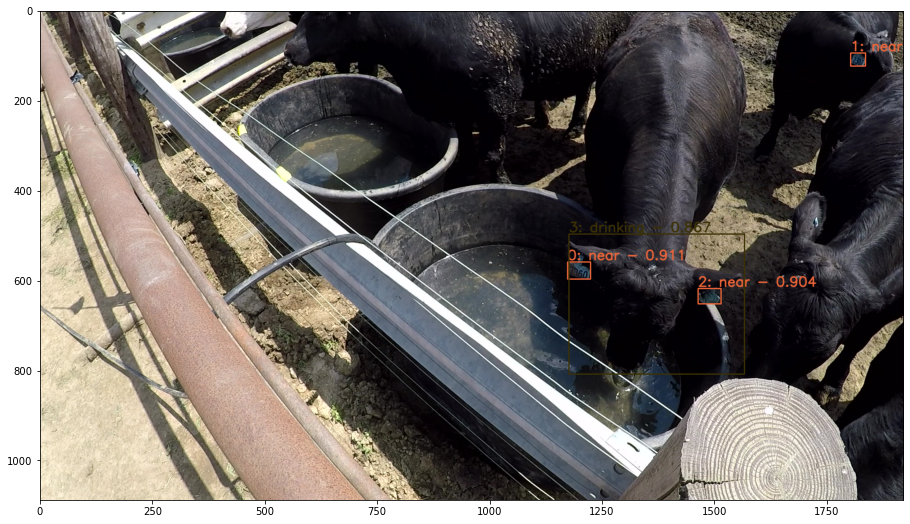

In [8]:
show_cow_predictions(image_name, cow_model_path_yolo)

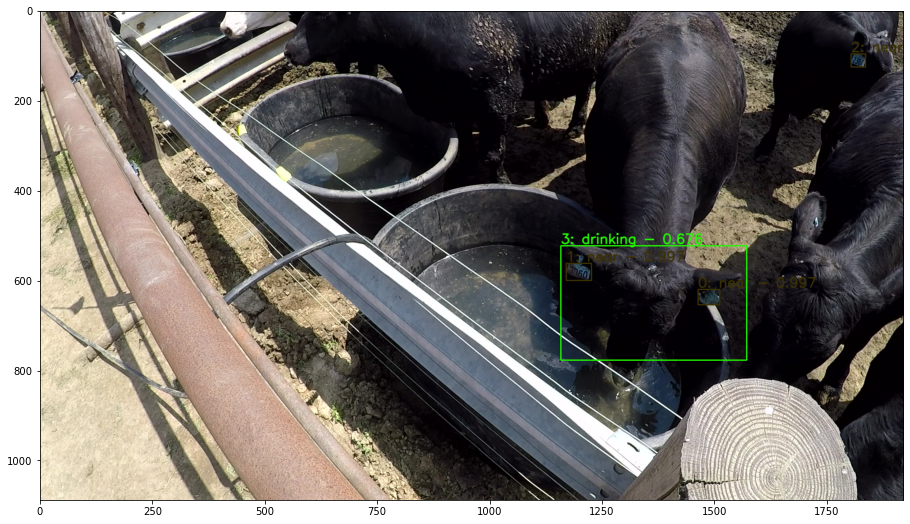

In [9]:
show_cow_predictions(image_name, cow_model_path, False)

### show_tags_in_img(...)
- **Arguments**: 
    - **path_to_image**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want to read only the tags that belong to drinking cows (True) or read all tags in img (False)
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
    - **saveFigure**: path to where figure will be saved (OPTIONAL); default = None
- **Returns**:
    - Nothing
- **Shows**:
    - plt plot depicting the image and the predicted classes detected in the image while reading near tags

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


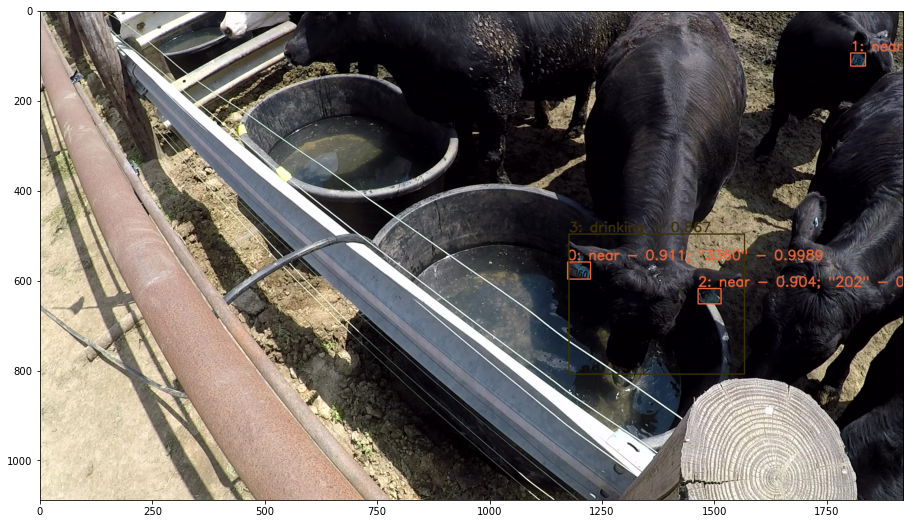

In [10]:
show_tags_in_img(image_name, cow_model_path_yolo, digit_model_path, True)

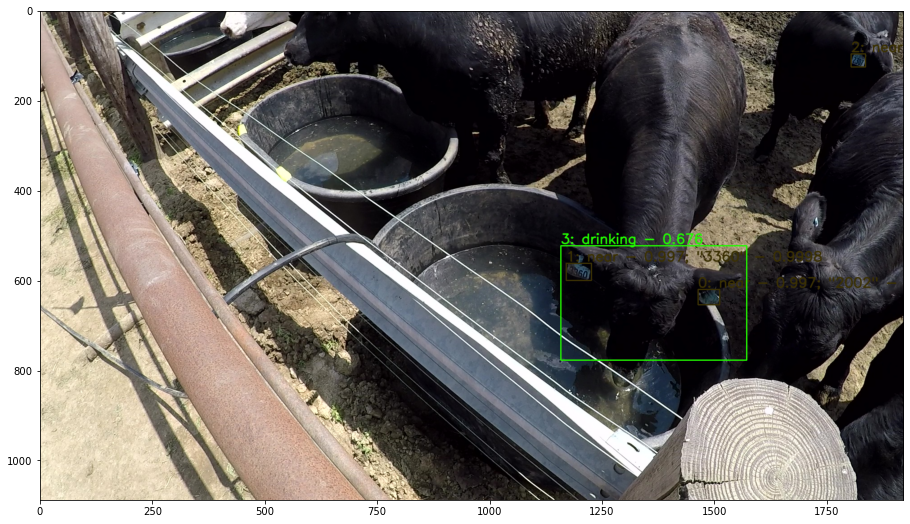

In [11]:
show_tags_in_img(image_name, cow_model_path, digit_model_path, True, False)

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


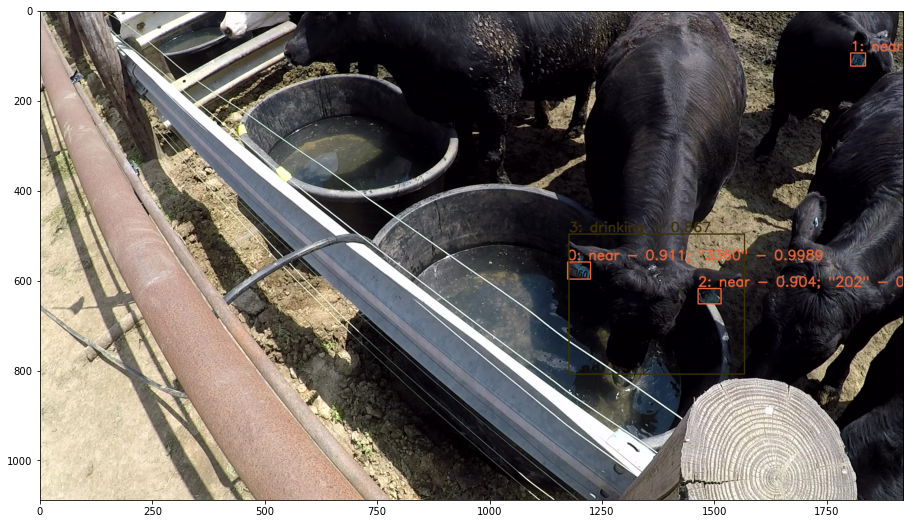

In [12]:
show_tags_in_img(image_name, cow_model_path_yolo, digit_model_path, False)

# Directory Image Reading

### read_tags_in_dir(...)
- **Arguments**: 
    - **path_to_directory**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want a dictionary of only the tags that belong to drinking cows (True) or a dictionary of all tags present in the imgs (False)
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
- **Returns**:
    - Dictionary with the name of the image a key and a list of tuples. Each tuple represents a reading of a tag. 
    - Example: {'image_name': \[('tagIndexWithinImage', 'predictedRead', 'confidenceInTagNumber'), ...\], ...}

In [13]:
dirOutcome = read_tags_in_dir(dir_name, cow_model_path_yolo, digit_model_path, True)
dirOutcome

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


{'204.jpg': [('0', '3095', '0.9999')]}

In [14]:
dirOutcome = read_tags_in_dir(dir_name, cow_model_path, digit_model_path, True, False)
dirOutcome

{'177.jpg': [('0', '3589', '0.9999')], '204.jpg': [('0', '3095', '0.9999')]}

In [15]:
dirOutcome_ALL = read_tags_in_dir(dir_name, cow_model_path_yolo, digit_model_path, False)
dirOutcome_ALL

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


{'175.jpg': [('0', '2386', '0.9999'),
  ('1', '819', '0.9999'),
  ('2', '1806', '0.9999'),
  ('3', '3200', '0.9999')],
 '177.jpg': [('0', '3589', '0.9999'), ('1', '3001', '0.9999')],
 '190.jpg': [('0', '2391', '0.9999'),
  ('1', '358', '0.9999'),
  ('2', '3031', '0.9999'),
  ('3', '2878', '0.3828')],
 '204.jpg': [('0', '3095', '0.9999'),
  ('2', '1988', '0.2920'),
  ('3', '1671', '0.6465')]}

In [16]:
dirOutcome_ALL = read_tags_in_dir(dir_name, cow_model_path, digit_model_path, False, False)
dirOutcome_ALL

{'175.jpg': [('0', '1806', '0.9999'),
  ('1', '3200', '0.9999'),
  ('2', '2386', '0.9999'),
  ('3', '819', '1.0000')],
 '177.jpg': [('0', '3589', '0.9999'),
  ('1', '3001', '0.9997'),
  ('2', '1972', '0.9999'),
  ('4', '1814', '0.9651')],
 '190.jpg': [('0', '2391', '0.9999'),
  ('1', '3031', '1.0000'),
  ('2', '358', '0.9999'),
  ('3', '1518', '0.2107')],
 '204.jpg': [('0', '3095', '0.9999'),
  ('1', '1691', '0.9540'),
  ('3', '1586', '0.4447')]}

### read_tags_in_dir_to_df(...)
- **Arguments**: 
    - **path_to_directory**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want a dataframe of only the tags that belong to drinking cows (True) or a dataframe of all tags present in the imgs (False)
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
- **Returns**:
    - Dataframe with X rows depending on the number of tag readings done and nine columns describing each reading
        - **imgNames**: name of the image the tag was detected from
        - **tagIndexWithinImage**: of the detections within the image, what index was this particular detection
        - **x0**: x-coordinate of top left corner of bbox
        - **y1**: y-coordinate of top left corner of bbox
        - **x1**: x-coordinate of bottom right corner of bbox
        - **y1**: y-coordinate of bottom right corner of bbox
        - **tagConfidence**: confidence of detection model that this is a near tag
        - **isDrinking**: confidence of detection model that this is a drinking cow (False if not a drinking cow)
        - **predictedTex**t: predicted tag text
        - **textConfidence**: confidence of tag reading model that the tag reading is correct

In [17]:
df = read_tags_in_dir_to_df(dir_name, cow_model_path_yolo, digit_model_path, True)
df

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


imgNames tagIndexWithinImage          x0          y0           x1  \
0  204.jpg                   0  993.186646  590.195496  1059.138184   

           y1  tagConfidence  isDrinking predictedText textConfidence  
0  643.581604       0.899847    0.883204          3095         0.9999

In [18]:
df = read_tags_in_dir_to_df(dir_name, cow_model_path, digit_model_path, True, False)
df

imgNames tagIndexWithinImage           x0          y0           x1  \
0  177.jpg                   0  1449.848511  570.357910  1490.695801   
1  204.jpg                   0   991.683228  594.927979  1060.266357   

           y1  tagConfidence  isDrinking predictedText textConfidence  
0  605.118530       0.997922    0.942965          3589         0.9999  
1  646.922974       0.997757    0.993161          3095         0.9999

In [19]:
df = read_tags_in_dir_to_df(dir_name, cow_model_path_yolo, digit_model_path, False)
df

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


imgNames tagIndexWithinImage           x0          y0           x1  \
0   175.jpg                   0   513.647095  488.361877   561.085327   
1   175.jpg                   1   108.017395  380.689301   159.224182   
2   175.jpg                   2  1571.805664  197.990265  1627.208984   
3   175.jpg                   3   869.452332  618.170532   918.510132   
4   177.jpg                   0  1448.225098  568.165161  1490.844971   
5   177.jpg                   1  1149.615112  352.818756  1180.146729   
6   190.jpg                   0  1214.563110  431.085144  1266.205566   
7   190.jpg                   1   839.998352  318.984131   869.473938   
8   190.jpg                   2   692.739380  452.042999   722.546753   
9   190.jpg                   3  1779.425171  305.314941  1803.922485   
10  204.jpg                   0   993.186646  590.195496  1059.138184   
11  204.jpg                   2  1406.574219  351.373047  1427.625732   
12  204.jpg                   3   442.872711  613.712769   490.973602   

            y1  tagConfidence isDrinking predictedText textConfidence  
0   531.139893       0.918013      False          2386         0.9999  
1   432.609192       0.911232      False           819         0.9999  
2   247.578125       0.895344      False          1806         0.9999  
3   659.601624       0.886876      False          3200         0.9999  
4   603.044067       0.867338      False          3589         0.9999  
5   383.841217       0.844322      False          3001         0.9999  
6   475.666748       0.908920      False          2391         0.9999  
7   354.076477       0.882342      False           358         0.9999  
8   480.778931       0.879447      False          3031         0.9999  
9   329.938538       0.831063      False          2878         0.3828  
10  643.581604       0.899847   0.883204          3095         0.9999  
11  378.925018       0.759616      False          1988         0.2920  
12  648.463379       0.759498      False          1671         0.6465

In [20]:
df = read_tags_in_dir_to_df(dir_name, cow_model_path, digit_model_path, False, False)
df

imgNames tagIndexWithinImage           x0          y0           x1  \
0   175.jpg                   0  1572.007568  204.261932  1626.485229   
1   175.jpg                   1   868.163818  623.850769   919.039368   
2   175.jpg                   2   514.249146  491.408844   561.558289   
3   175.jpg                   3   109.504410  382.861877   157.714783   
4   177.jpg                   0  1449.848511  570.357910  1490.695801   
5   177.jpg                   1  1149.332397  354.584137  1177.240845   
6   177.jpg                   2   906.102356  628.903137   940.423584   
7   177.jpg                   4   534.186707  632.422913   570.383789   
8   190.jpg                   0  1215.109009  435.387970  1263.871460   
9   190.jpg                   1   693.232971  453.941956   724.323242   
10  190.jpg                   2   842.632446  320.534332   867.130371   
11  190.jpg                   3  1780.798828  307.132294  1801.104492   
12  204.jpg                   0   991.683228  594.927979  1060.266357   
13  204.jpg                   1   445.357544  617.217468   485.911469   
14  204.jpg                   3  1406.557373  352.879089  1426.736328   

            y1  tagConfidence isDrinking predictedText textConfidence  
0   250.609222       0.998474      False          1806         0.9999  
1   661.321960       0.998419      False          3200         0.9999  
2   533.236328       0.998353      False          2386         0.9999  
3   434.976532       0.996125      False           819         1.0000  
4   605.118530       0.997922   0.942965          3589         0.9999  
5   388.022614       0.996323      False          3001         0.9997  
6   657.525574       0.993287      False          1972         0.9999  
7   656.899963       0.935809      False          1814         0.9651  
8   476.798187       0.998155      False          2391         0.9999  
9   483.064026       0.995054      False          3031         1.0000  
10  354.450836       0.982365      False           358         0.9999  
11  333.545746       0.757818      False          1518         0.2107  
12  646.922974       0.997757   0.993161          3095         0.9999  
13  648.788757       0.993267      False          1691         0.9540  
14  383.351044       0.977559      False          1586         0.4447

### read_tags_in_dir_to_csv(...)
- **Arguments**: 
    - **path_to_directory**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want a dictionary of only the tags that belong to drinking cows (True) or a dictionary of all tags present in the imgs (False)
    - **path_to_csv_to_make**: path to the csv document to be made by function
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
- **Returns**:
    - Nothing; simply prints done when finished computing.
- **Creates**:
    - A csv file with X rows depending on the number of tag readings done and nine columns describing each reading

In [21]:
read_tags_in_dir_to_csv(dir_name, cow_model_path_yolo, digit_model_path, "sample_outputs/sample_demo_output_drinking_only.csv")

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Done.


In [22]:
read_tags_in_dir_to_csv(dir_name, cow_model_path, digit_model_path, "sample_outputs/sample_demo_output_nonyolo.csv", True, False)

Done.


In [23]:
read_tags_in_dir_to_csv(dir_name, cow_model_path_yolo, digit_model_path, "sample_outputs/sample_demo_output_all.csv", False)

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Done.


In [24]:
read_tags_in_dir_to_csv(dir_name, cow_model_path, digit_model_path, "sample_outputs/sample_demo_output_all_nonyolo.csv", False, False)

Done.


### show_tags_in_dir(...)
- **Arguments**: 
    - **path_to_directory**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want to read only the tags that belong to drinking cows (True) or read all tags in img (False); default = True
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
- **Returns**:
    - Nothing
- **Shows**:
    - Up to four plt plots depicting the first four images in the directory and the predicted classes detected in the image while reading the near tags

In [25]:
%matplotlib inline

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


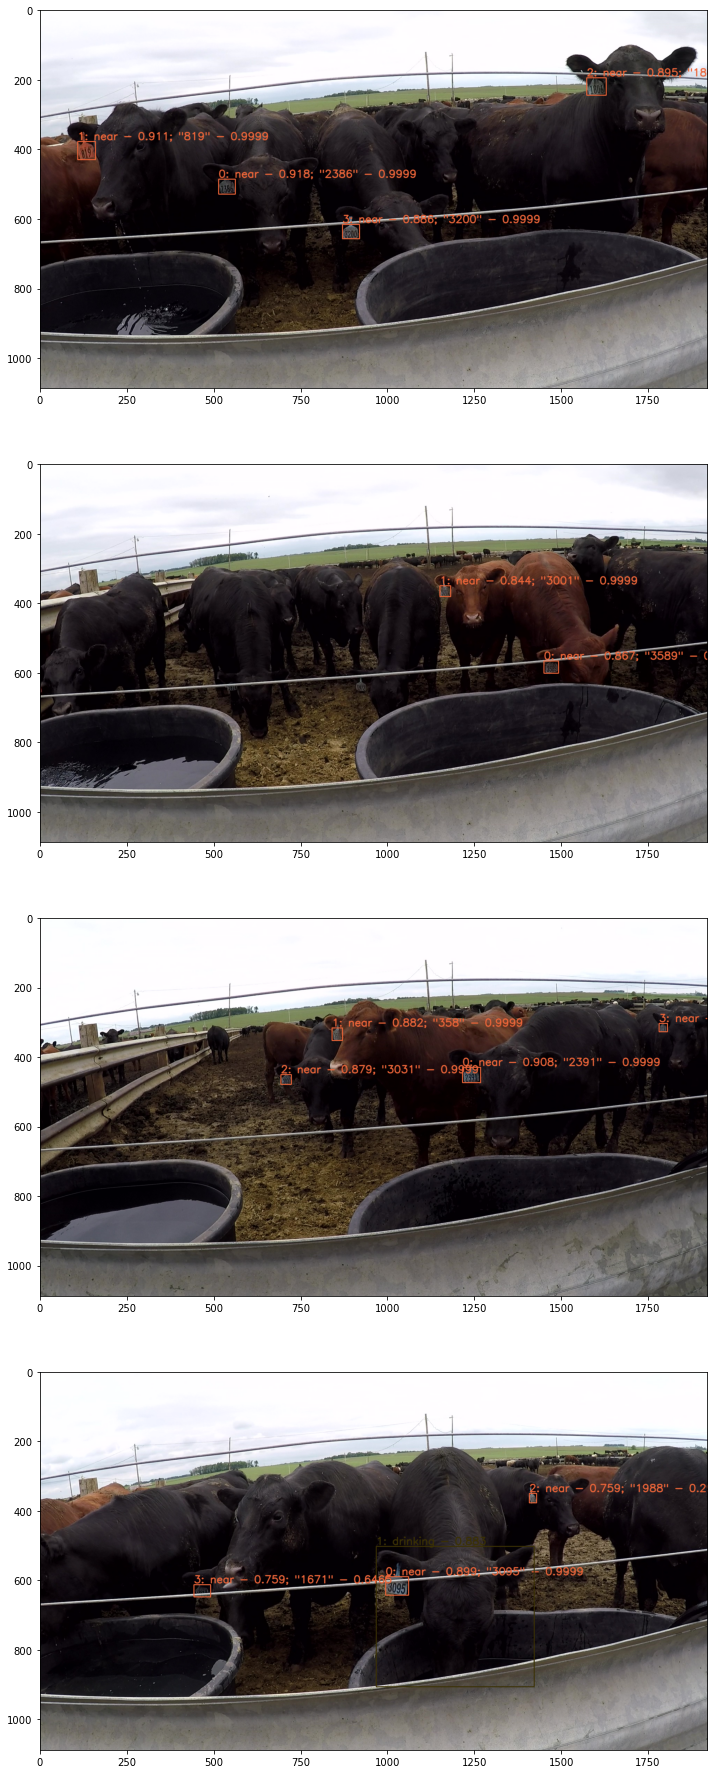

In [26]:
show_tags_in_dir(dir_name, cow_model_path_yolo, digit_model_path, False)

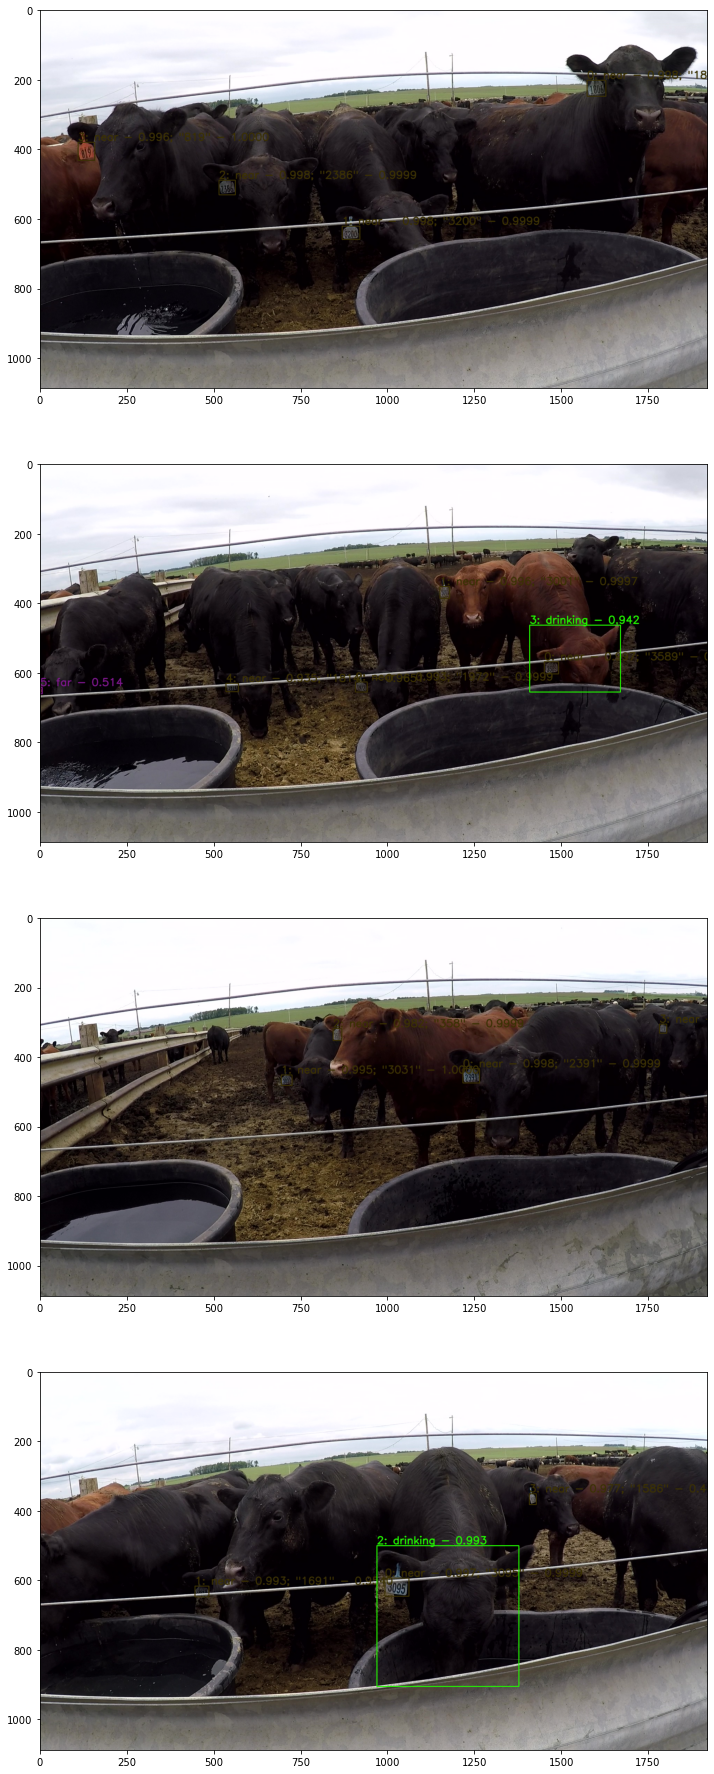

In [27]:
show_tags_in_dir(dir_name, cow_model_path, digit_model_path, False, False)

# Video Reading

### read_tags_in_video(...)
- **Arguments**: 
    - **path_to_video** (.mp4, etc.)
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want a dictionary of only the tags that belong to drinking cows (True) or a dictionary of all tags present in the imgs (False); default = True
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
    - **skipFrames**: interval number of frames to skip between detections; default = 16
    - **drinkingThresh**: how close together in time should tag detections be to be considered one interval; default = 2
- **Returns**:
    - Dictionary with the name of the tag a key and a list of tuples. Each tuple represents an interval of time the tag was read.  
    - Example: {'tag_number': \[('startTime (s)', 'endTime (s)', 'confidenceInTagReading', 'confidenceInDrinking'), ...\], ...}

In [28]:
output = read_tags_in_video(vid_path, cow_model_path_yolo, digit_model_path)
output

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


{'23': [(10.121637292464879, 10.121637292464879, 1.0, 0.9569628238677979)],
 '239': [(10.652608429118773, 10.652608429118773, 0.9999, 0.9462447166442871)]}

In [29]:
output = read_tags_in_video(vid_path, cow_model_path, digit_model_path, True, False)
output

{'1911': [(0.033185696040868455,
   0.033185696040868455,
   0.1665,
   0.7109777927398682)],
 '191': [(0.5641568326947637,
   1.6260991060025543,
   0.4993666666666667,
   0.6044489542643229)],
 '1901': [(2.1570702426564496, 2.688041379310345, 0.454, 0.6061239242553711)],
 '196': [(3.21901251596424, 3.21901251596424, 0.789, 0.5992060303688049)],
 '23': [(10.121637292464879, 10.121637292464879, 1.0, 0.9762104749679565)],
 '239': [(10.652608429118773, 10.652608429118773, 1.0, 0.9685258865356445)],
 '2318': [(20.21008888888889, 20.21008888888889, 0.9999, 0.557428240776062)],
 '3127': [(21.803002298850576,
   21.803002298850576,
   0.9999,
   0.6074041724205017)]}

In [30]:
output2 = read_tags_in_video(vid_path, cow_model_path_yolo, digit_model_path, False)
output2

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


{'2391': [(0.033185696040868455, 3.21901251596424, 0.9998857142857143, 0.0),
  (20.21008888888889, 25.519800255427842, 0.9530700000000001, 0.0)],
 '191': [(0.5641568326947637, 0.5641568326947637, 0.4437, 0.0)],
 '1901': [(1.095127969348659, 1.6260991060025543, 0.3104, 0.0)],
 '1991': [(2.1570702426564496, 2.1570702426564496, 0.3131, 0.0)],
 '190': [(2.688041379310345, 2.688041379310345, 0.3125, 0.0)],
 '196': [(3.21901251596424, 3.21901251596424, 0.9206, 0.0)],
 '2': [(3.7499836526181354, 3.7499836526181354, 0.5232, 0.0),
  (15.431348659003831, 15.962319795657727, 0.99995, 0.0),
  (18.617175478927205, 19.679117752234994, 0.99995, 0.0),
  (23.39591570881226, 23.39591570881226, 0.7951, 0.0)],
 '2318': [(5.8738681992337165, 5.8738681992337165, 0.9999, 0.0),
  (12.24552183908046, 13.838435249042146, 0.9999750000000001, 0.0),
  (19.679117752234994, 24.988829118773946, 0.9996000000000002, 0.0)],
 '23': [(10.121637292464879, 10.121637292464879, 1.0, 0.9569628238677979)],
 '239': [(10.65260842

In [31]:
output2 = read_tags_in_video(vid_path, cow_model_path, digit_model_path, False, False)
output2

{'2391': [(0.033185696040868455, 3.21901251596424, 0.9998714285714286, 0.0),
  (20.21008888888889, 25.519800255427842, 0.9678600000000002, 0.0)],
 '1911': [(0.033185696040868455,
   0.033185696040868455,
   0.1665,
   0.7109777927398682)],
 '191': [(0.5641568326947637,
   1.6260991060025543,
   0.4993666666666667,
   0.6044489542643229)],
 '1901': [(2.1570702426564496, 2.688041379310345, 0.454, 0.6061239242553711)],
 '196': [(3.21901251596424, 3.21901251596424, 0.789, 0.5992060303688049)],
 '2': [(3.7499836526181354, 3.7499836526181354, 0.8958, 0.0),
  (15.431348659003831, 16.493290932311623, 0.9995333333333334, 0.0),
  (18.617175478927205, 18.617175478927205, 0.998, 0.0),
  (22.864944572158365, 22.864944572158365, 0.9936, 0.0)],
 '1991': [(3.7499836526181354, 3.7499836526181354, 0.1643, 0.0)],
 '1940': [(4.28095478927203, 4.28095478927203, 0.3764, 0.0)],
 '3525': [(4.28095478927203, 4.28095478927203, 0.5014, 0.0)],
 '1981': [(5.342897062579821, 5.342897062579821, 0.5923, 0.0)],
 '2318

### read_tags_in_video_to_df(...)
- **Arguments**: 
    - **path_to_video**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want a dataframe of only the tags that belong to drinking cows (True) or a dataframe of all tags present in the imgs (False); default = True
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
    - **skipFrames**: how many frames of the video to skip between detections; default = 16
    - **drinkingThresh**: how close together in time should tag detections be to be considered one interval; default = 2
- **Returns**:
    - Dataframe with X rows depending on the number of tag time intervals found and eight columns describing each interval
        - **tagNames**: number read from tag during time interval (Ex: 2318)
        - **tagIndexOfOccurrence**: of intervals found with that tagName, what index is this particular time interval (0,1,2,...)
        - **averageTextConfidence**: what was the average confidence of the text reading over all frames in time interval
        - **averageDrinkingConfidence**: what was the average confidence of the drinking recognition over all frames in time interval
        - **timeStart**: when the tag was found (seconds since the start of the video)
        - **timeEnd**: when the tag was last found before the end of this time interval (seconds since the start of the video)
        - **dateStart**: when the tag was found (as a date)
        - **dateEnd**: when the tag was last found before the end of this time interval (as a date)

In [32]:
df = read_tags_in_video_to_df(vid_path, cow_model_path_yolo, digit_model_path)
df.head()

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


tagNames  tagIndexOfOccurrence  averageTextConfidence  \
0       23                     0                 1.0000   
1      239                     0                 0.9999   

   averageDrinkingConfidence  timeStart    timeEnd                  dateStart  \
0                   0.956963  10.121637  10.121637 2022-06-28 10:22:18.844915   
1                   0.946245  10.652608  10.652608 2022-06-28 10:22:19.375886   

                     dateEnd  
0 2022-06-28 10:22:18.844915  
1 2022-06-28 10:22:19.375886

In [33]:
df = read_tags_in_video_to_df(vid_path, cow_model_path, digit_model_path, True, False)
df.head()

tagNames  tagIndexOfOccurrence  averageTextConfidence  \
0     1911                     0               0.166500   
1      191                     0               0.499367   
2     1901                     0               0.454000   
3      196                     0               0.789000   
4       23                     0               1.000000   

   averageDrinkingConfidence  timeStart    timeEnd                  dateStart  \
0                   0.710978   0.033186   0.033186 2022-06-28 10:22:08.756463   
1                   0.604449   0.564157   1.626099 2022-06-28 10:22:09.287434   
2                   0.606124   2.157070   2.688041 2022-06-28 10:22:10.880348   
3                   0.599206   3.219013   3.219013 2022-06-28 10:22:11.942290   
4                   0.976210  10.121637  10.121637 2022-06-28 10:22:18.844915   

                     dateEnd  
0 2022-06-28 10:22:08.756463  
1 2022-06-28 10:22:10.349377  
2 2022-06-28 10:22:11.411319  
3 2022-06-28 10:22:11.942290  
4 2022-06-28 10:22:18.844915

In [34]:
df2 = read_tags_in_video_to_df(vid_path, cow_model_path_yolo, digit_model_path, False)
df2.head()

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


tagNames  tagIndexOfOccurrence  averageTextConfidence  \
0     2391                     0               0.999886   
1     2391                     1               0.953070   
2      191                     0               0.443700   
3     1901                     0               0.310400   
4     1991                     0               0.313100   

   averageDrinkingConfidence  timeStart    timeEnd                  dateStart  \
0                        0.0   0.033186   3.219013 2022-06-28 10:22:08.756463   
1                        0.0  20.210089  25.519800 2022-06-28 10:22:28.933367   
2                        0.0   0.564157   0.564157 2022-06-28 10:22:09.287434   
3                        0.0   1.095128   1.626099 2022-06-28 10:22:09.818406   
4                        0.0   2.157070   2.157070 2022-06-28 10:22:10.880348   

                     dateEnd  
0 2022-06-28 10:22:11.942290  
1 2022-06-28 10:22:34.243078  
2 2022-06-28 10:22:09.287434  
3 2022-06-28 10:22:10.349377  
4 2022-06-28 10:22:10.880348

In [35]:
df2 = read_tags_in_video_to_df(vid_path, cow_model_path, digit_model_path, False, False)
df2.head()

tagNames  tagIndexOfOccurrence  averageTextConfidence  \
0     2391                     0               0.999871   
1     2391                     1               0.967860   
2     1911                     0               0.166500   
3      191                     0               0.499367   
4     1901                     0               0.454000   

   averageDrinkingConfidence  timeStart    timeEnd                  dateStart  \
0                   0.000000   0.033186   3.219013 2022-06-28 10:22:08.756463   
1                   0.000000  20.210089  25.519800 2022-06-28 10:22:28.933367   
2                   0.710978   0.033186   0.033186 2022-06-28 10:22:08.756463   
3                   0.604449   0.564157   1.626099 2022-06-28 10:22:09.287434   
4                   0.606124   2.157070   2.688041 2022-06-28 10:22:10.880348   

                     dateEnd  
0 2022-06-28 10:22:11.942290  
1 2022-06-28 10:22:34.243078  
2 2022-06-28 10:22:08.756463  
3 2022-06-28 10:22:10.349377  
4 2022-06-28 10:22:11.411319

### read_tags_in_video_to_csv(...)
- **Arguments**: 
    - **path_to_directory**
    - **path_to_cow_model**
    - **path_to_digit_model**
    - **drinkingOnly**: whether you want a dictionary of only the tags that belong to drinking cows (True) or a dictionary of all tags present in the imgs (False); default = True
    - **path_to_csv_to_make**: path to the csv document to be made by function
    - **yolo**: whether you are using a yolov5 detection model or not; default = True
    - **skipFrames**: how many frames of the video to skip between detections; default = 16
    - **drinkingThresh**: how close together in time should tag detections be to be considered one interval; default = 2
- **Returns**:
    - Nothing; simply prints done when finished computing.
- **Creates**:
    - A csv file with X rows depending on the number of tag readings done and eight columns describing each reading
        - **tagNames**: text read from tag during this time interval
        - **tagIndexOfOccurrence**: within the video, what index was this particular time interval
        - **averageTextConfidence**: what was the average confidence of this interval's tag text
        - **averageDrinkingConfidence**: what was the average drinking confidence of this tag during the interval
        - **timeStart**: start of time interval in seconds since the start of the video
        - **timeEnd**: end of time interval in seconds since the start of the video
        - **dateStart**: start of the time interval as a date (based on the modification time of the video file)
        - **dateEnd**: end of the time interval as a date (based on the modification time of the video file)

In [36]:
read_tags_in_video_to_csv(vid_path, cow_model_path_yolo, digit_model_path, "sample_outputs/sample_video_output_yolo.csv")

YOLOv5  2022-9-1 Python-3.10.4 torch-1.11.0 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 8192MiB)

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Done.


In [37]:
read_tags_in_video_to_csv(vid_path, cow_model_path, digit_model_path, "sample_outputs/sample_video_output.csv", True, False)

Done.


# Parsing/Cleaning Output

### parse_df_to_df(...)
- **Arguments**: 
    - **dataframe** gotten from read_tags_in_video_to_df
    - **simThresh**: the threshold for how similar digits should be to be considered similar enough to be grouped together; default = 0.6
    - **timeSimThresh**: the maximum time interval between similar readings to be considered one reading; default = 1 second
- **Returns**:
    - Dataframe with X rows depending on the number of tag time intervals found and eight columns describing each interval
        - **tagNames**: the number read from tag that was most heavily weighed during time interval; i.e. was present for the longest time, had highest confidence, had largest number of characters (Ex: 2318)
        - **averageTextConfidence**: what was the average confidence of the most common reading over all frames in specific time interval
        - **averageDrinkingConfidence**: what was the average confidence of the drinking recognition for the most common reading over all frames in time interval
        - **timeStart**: when this similar tag was found (seconds since the start of the video)
        - **timeEnd**: when this similar tag was last found before the end of this time interval (seconds since the start of the video)
        - **dateStart**: when the similar tag was found (as a date)
        - **dateEnd**: when the similar tag was last found before the end of this time interval (as a date)
        - **alternateNames**: list of alternate names found for this similar tag along with that reading's text confidence, timeStart, and timeEnd

In [38]:
clean_df = parse_df_to_df(df)
clean_df.head()

tagNames  averageTextConfidence  averageDrinkingConfidence  timeStart  \
0     1901                 0.4540                   0.606124   0.033186   
1      196                 0.7890                   0.599206   3.219013   
2      239                 1.0000                   0.968526  10.121637   
3     2318                 0.9999                   0.557428  20.210089   
4     3127                 0.9999                   0.607404  21.803002   

     timeEnd                  dateStart                    dateEnd  \
0   2.688041 2022-06-28 10:22:08.756463 2022-06-28 10:22:11.411319   
1   3.219013 2022-06-28 10:22:11.942290 2022-06-28 10:22:11.942290   
2  10.652608 2022-06-28 10:22:18.844915 2022-06-28 10:22:19.375886   
3  20.210089 2022-06-28 10:22:28.933367 2022-06-28 10:22:28.933367   
4  21.803002 2022-06-28 10:22:30.526280 2022-06-28 10:22:30.526280   

                                      alternateNames  
0  [(191, 0.4993666666666667, 0.5641568326947637,...  
1                                                 []  
2  [(239, 1.0, 10.652608429118773, 10.65260842911...  
3                                                 []  
4                                                 []

### parse_df_to_csv(...)
- **Arguments**: 
    - **dataframe**: gotten from read_tags_in_video_to_df
    - **new_csv_path**: path to the new csv to be created
    - **simThresh**: the threshold for how similar digits should be to be considered similar enough to be grouped together; default = 0.6
    - **timeSimThresh**: the maximum time interval between similar readings to be considered one reading; default = 1 second
- **Returns**:
    - Nothing; simply prints done when finished computing.
- **Creates**:
    - A csv file with X rows depending on the number of tag readings done and eight columns describing each reading

In [39]:
parse_df_to_csv(df, "sample_outputs/sample_video_output_CLEAN.csv")

Done.


### parse_csv_to_df(...)
- **Arguments**: 
    - **csv_path**: path to the csv to be read
    - **simThresh**: the threshold for how similar digits should be to be considered similar enough to be grouped together; default = 0.6
    - **timeSimThresh**: the maximum time interval between similar readings to be considered one reading; default = 1 second
- **Returns**:
    - Dataframe with X rows depending on the number of tag time intervals found and eight columns describing each interval
        - **tagNames**: the number read from tag that was most heavily weighed during time interval; i.e. was present for the longest time, had highest confidence, had largest number of characters (Ex: 2318)
        - **averageTextConfidence**: what was the average confidence of the most common reading over all frames in specific time interval
        - **averageDrinkingConfidence**: what was the average confidence of the drinking recognition for the most common reading over all frames in time interval
        - **timeStart**: when this similar tag was found (seconds since the start of the video)
        - **timeEnd**: when this similar tag was last found before the end of this time interval (seconds since the start of the video)
        - **dateStart**: when the similar tag was found (as a date)
        - **dateEnd**: when the similar tag was last found before the end of this time interval (as a date)
        - **alternateNames**: list of alternate names found for this similar tag along with that reading's text confidence, timeStart, and timeEnd

In [40]:
clean_df_all = parse_csv_to_df("sample_outputs/sample_video_output_all.csv")
clean_df_all.head()

tagNames  averageTextConfidence  averageDrinkingConfidence  timeStart  \
0      2391               0.999871                   0.000000   0.033186   
1      1901               0.454000                   0.606124   0.033186   
2       196               0.789000                   0.599206   3.219013   
3         2               0.895800                   0.000000   3.749984   
4      1991               0.164300                   0.000000   3.749984   

    timeEnd                   dateStart                     dateEnd  \
0  3.219013  2022-06-28 10:22:08.756463  2022-06-28 10:22:11.942290   
1  2.688041  2022-06-28 10:22:08.756463  2022-06-28 10:22:11.411319   
2  3.219013  2022-06-28 10:22:11.942290  2022-06-28 10:22:11.942290   
3  3.749984  2022-06-28 10:22:12.473261  2022-06-28 10:22:12.473261   
4  3.749984  2022-06-28 10:22:12.473261  2022-06-28 10:22:12.473261   

                                      alternateNames  
0                                                 []  
1  [(191, 0.4993666666666667, 0.5641568326947637,...  
2                                                 []  
3                                                 []  
4                                                 []

### parse_csv_to_csv(...)
- **Arguments**: 
    - **old_csv_path**: path to the old csv to be read from (created by read_tags_in_video_to_csv function)
    - **new_csv_path**: path to the new csv to be created
    - **simThresh**: the threshold for how similar digits should be to be considered similar enough to be grouped together; default = 0.6
    - **timeSimThresh**: the maximum time interval between similar readings to be considered one reading; default = 1 second
- **Returns**:
    - Nothing; simply prints done when finished computing.
- **Creates**:
    - A csv file with X rows depending on the number of tag readings done and eight columns describing each reading

In [41]:
parse_csv_to_csv("sample_outputs/sample_video_output_all.csv", "sample_outputs/sample_video_output_all_CLEAN.csv")

Done.
